<br>

## 머신러닝 회귀모델로 예측해보기

In [1]:
# 데이터 준비 
import pandas as pd
import numpy as np

samsung_data = pd.read_csv('samsung.csv', encoding='cp949', thousands=',')
samsung_data = pd.DataFrame(samsung_data).sort_index(ascending=False)

del(samsung_data['일자'])
samsung = np.array(samsung_data)

samsung_target = pd.read_excel('samsung0206.xlsx', encoding='cp949', thousands=',')
samsung_target = pd.DataFrame(samsung_target).sort_index(ascending=False)

del(samsung_target['Unnamed: 0'])
predict = np.array(samsung_target)

# 데이터 셋 준비
x = []
y = []

# print(samsung_data.iloc[1:6, :], samsung_data.iloc[6,3])  >>> 예시
for i in range(1, len(samsung)-4, +1):
    x_tmp = samsung[i:i+4, :]   # (5행 5열 데이터 뽑아서 넣어줘)
    y_tmp = samsung[i+4, 3]     # x데이터 바로 다음 행의 종가 데이터 알려줘
    
    x.append(x_tmp)
    y.append(y_tmp)
########################################################################
x = np.array(x)
y = np.array(y)

# Data split하기
from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x, y,
                                                     test_size=0.4,
                                                     shuffle = False)
x_test, x_val , y_test, y_val = train_test_split(x_test, y_test,
                                                     test_size=0.5,
                                                     shuffle = False)

In [12]:
y

array([50100, 49200, 49850, 49400, 49500, 50000, 51800, 51400, 52700,
       52300, 51300, 49500, 50700, 51300, 51100, 51300, 50600, 49650,
       49900, 49400, 48200, 47650, 46600, 47000, 47000, 47050, 47250,
       46650, 47000, 47950, 46800, 46650, 45550, 46150, 46250, 45950,
       44900, 45600, 46300, 46000, 45500, 46500, 46050, 45850, 46550,
       46900, 47450, 46500, 46150, 46150, 46900, 46900, 46500, 46250,
       46550, 45550, 45750, 45800, 46700, 46800, 46900, 45400, 45050,
       45150, 44250, 44100, 43850, 44800, 46100, 46200, 46150, 46300,
       46550, 46800, 47650, 48450, 47450, 47650, 46600, 46100, 44900,
       45500, 45050, 44550, 44050, 45850, 45150, 45500, 46150, 47250,
       47400, 47500, 46450, 46350, 45700, 44700, 44700, 44950, 45300,
       43100, 44000, 43800, 43600, 44150, 44050, 43900, 43550, 43050,
       42550, 41000, 41000, 41400, 42350, 42400, 42150, 44150, 43800,
       43750, 44000, 44050, 44300, 45200, 44500, 44100, 44250, 44000,
       43650, 42800,

In [2]:
print(x_train.shape, x_test.shape, x_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(252, 4, 5) (84, 4, 5) (85, 4, 5)
(252,) (84,) (85,)


In [3]:
x_train = x_train.reshape(x_train.shape[0], 4*5)
x_test = x_test.reshape(x_test.shape[0], 4*5)
x_val = x_val.reshape(x_val.shape[0], 4*5)
predict = predict.reshape(1,4*5)

In [4]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)

forest.fit(x_train, y_train)

y_train_predict = forest.predict(x_train)
y_test_predict = forest.predict(x_test)
y_predict = forest.predict(predict)

from sklearn.metrics import mean_squared_error
print("훈련 MSE : {} , 테스트 MSE : {}".format(
    mean_squared_error(y_train, y_train_predict),
    mean_squared_error(y_test, y_test_predict)))

from sklearn.metrics import r2_score
print("훈련 R2 : {} , 테스트 R2 : {}".format(
    r2_score(y_train, y_train_predict),
    r2_score(y_test, y_test_predict)))

훈련 MSE : 85110.28208333337 , 테스트 MSE : 438687.52922619047
훈련 R2 : 0.9897972896711751 , 테스트 R2 : 0.854410237623476


In [5]:
print("종가(test) : {}".format(y_test_predict[len(y_test_predict)-1]))
print("종가(pred) : {}".format(y_predict))    

종가(test) : 48784.35
종가(pred) : [50607.85]


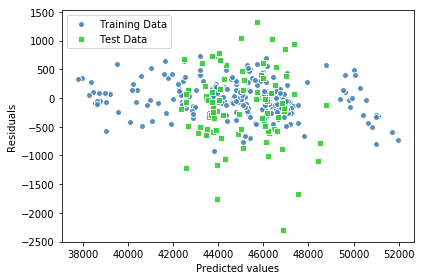

In [7]:
import matplotlib.pyplot as plt

# 트레이닝 모델
plt.scatter(y_train_predict,
            (y_train_predict-y_train),
            c='steelblue',
            edgecolors='white',
            marker='o',
            s=35,
            alpha=0.9,
            label="Training Data")
# 테스트 모델
plt.scatter(y_test_predict,
            (y_test_predict-y_test),
            c='limegreen',
            edgecolors='white',
            marker='s',
            s=35,
            alpha=0.9,
            label="Test Data")

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()